<a href="https://colab.research.google.com/github/moaml1999/my_work/blob/main/project_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data From Kaggle

In [2]:
# First we'll create a new folder to put kaggle.json into
!mkdir /root/.kaggle

# Let's confirm that the directory is created
!cd /root/ && ls -la

total 64
drwx------ 1 root root 4096 Feb 26 15:01 .
drwxr-xr-x 1 root root 4096 Feb 26 15:00 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Feb 24 18:23 .cache
drwxr-xr-x 1 root root 4096 Feb 24 18:21 .config
drwxr-xr-x 3 root root 4096 Feb 24 17:49 .gsutil
drwxr-xr-x 5 root root 4096 Feb 24 18:21 .ipython
drwx------ 2 root root 4096 Feb 24 18:21 .jupyter
drwxr-xr-x 2 root root 4096 Feb 26 15:01 .kaggle
drwxr-xr-x 2 root root 4096 Feb 26 15:00 .keras
drwx------ 1 root root 4096 Feb 24 18:21 .local
drwxr-xr-x 4 root root 4096 Feb 24 18:21 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


In [3]:
# Import colab's files module
from google.colab import files

# Start the upload, this will open the upload prompt below
uploaded = files.upload()

# Confirm that we've uploaded the kaggle.json file
print("Uploaded File:", list(uploaded.keys())[0])

Saving kaggle.json to kaggle.json
Uploaded File: kaggle.json


In [4]:
# Move kaggle.json to .kaggle directory
!mv kaggle.json /root/.kaggle/kaggle.json

# Change file permission to allow python to access it
!chmod 600 /root/.kaggle/kaggle.json

# List files inside .kaggle to confirm that the file is moved
!cd /root/.kaggle && ls -la

total 16
drwxr-xr-x 2 root root 4096 Feb 26 15:01 .
drwx------ 1 root root 4096 Feb 26 15:01 ..
-rw------- 1 root root   70 Feb 26 15:01 kaggle.json


In [5]:
!kaggle datasets download -d shayanfazeli/heartbeat

 98% 97.0M/98.8M [00:01<00:00, 71.0MB/s]
100% 98.8M/98.8M [00:01<00:00, 62.2MB/s]


In [6]:
!unzip /content/heartbeat.zip

Archive:  /content/heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


#Imports libaray

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics , linear_model
from tensorflow.keras.layers import *

#Loading data & preprocessing

In [8]:
tf.random.set_seed(42)

In [9]:
data_test=pd.read_csv('/content/mitbih_test.csv',header=None)
data_train=pd.read_csv('/content/mitbih_train.csv',header=None)

In [10]:
data_test.shape , data_train.shape

((21892, 188), (87554, 188))

In [11]:
#Check any of the features have a null
data_test.isna().sum().sum() , data_train.isna().sum().sum()

(0, 0)

In [12]:
#split data 
x_train=data_train.drop([187],axis=1)
y_train=data_train[:][187]

x_test=data_test.drop([187],axis=1)
y_test=data_test[:][187]

### Pie chart

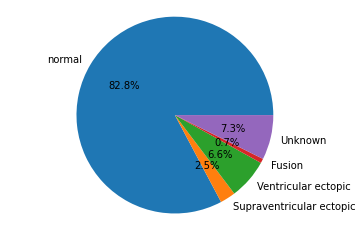

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
a={ 'normal' :0 ,'Supraventricular ectopic':1 , 'Ventricular ectopic':2, 'Fusion':3, 'Unknown':4}
labels =list(a.keys())


plt.pie(y_train.value_counts()[a.values()], labels=a.keys(), autopct='%1.1f%%',)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### one hot encoding 

In [14]:
#Converts a class vector (integers) to binary class matrix.
y_train_encode=tf.keras.utils.to_categorical(y_train)
y_test_encode=tf.keras.utils.to_categorical(y_test)

# **Models (-_-)**

---



## **Model 1: LogisticRegression**

###Define model

In [15]:
model_log=linear_model.LogisticRegression(random_state=42)

### Fitting model

In [16]:
model_log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Evaluation

In [17]:
y_pred=model_log.predict(x_test)
print('Accuracy Score for test data:',metrics.accuracy_score(y_test,y_pred))
print('Accuracy Score for train data',model_log.score(x_train,y_train))

Accuracy Score for test data: 0.9117029051708386
Accuracy Score for train data 0.913447700847477


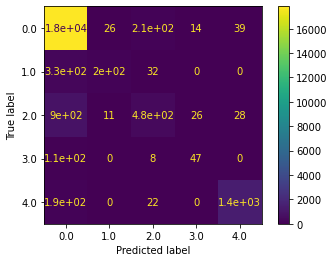

In [18]:
metrics.plot_confusion_matrix(model_log, x_test, y_test)

##**Model 2: Dense Neural Network**

###Define model

In [19]:
model_DNN=tf.keras.Sequential([
                           Input([187]),
                           Dense(128,activation='relu'),
                           Dropout(0.2),
                           Dense(128,activation='relu'),
                           Dropout(0.2),
                           Dense(5,activation='softmax')
])
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               24064     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 41,221
Trainable params: 41,221
Non-trainable params: 0
_________________________________________________________________


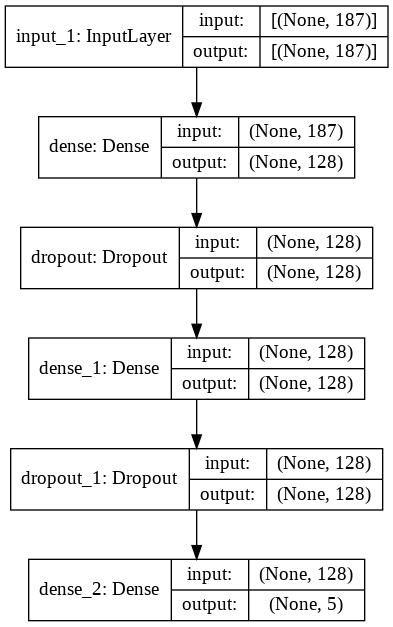

In [20]:
#Converts a Keras model to dot format
tf.keras.utils.plot_model(model_DNN, show_shapes=True, show_layer_names=True)

###Compile and fitting

In [21]:
model_DNN.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [22]:
save_model=tf.keras.callbacks.ModelCheckpoint('moamel_DNN.h5',save_best_only=True)
model_DNN.fit(x_train,y_train_encode,epochs=10,validation_data=(x_test,y_test_encode),callbacks=[save_model])

Epoch 1/10
2737/2737 [==============================] - 10s 3ms/step - loss: 0.3511 - acc: 0.9055 - val_loss: 0.1625 - val_acc: 0.9555
Epoch 2/10
2737/2737 [==============================] - 7s 3ms/step - loss: 0.1667 - acc: 0.9539 - val_loss: 0.1354 - val_acc: 0.9624
Epoch 3/10
2737/2737 [==============================] - 7s 3ms/step - loss: 0.1416 - acc: 0.9602 - val_loss: 0.1202 - val_acc: 0.9670
Epoch 4/10
2737/2737 [==============================] - 8s 3ms/step - loss: 0.1322 - acc: 0.9626 - val_loss: 0.1106 - val_acc: 0.9698
Epoch 5/10
2737/2737 [==============================] - 7s 3ms/step - loss: 0.1160 - acc: 0.9672 - val_loss: 0.1092 - val_acc: 0.9695
Epoch 6/10
2737/2737 [==============================] - 7s 3ms/step - loss: 0.1105 - acc: 0.9679 - val_loss: 0.1007 - val_acc: 0.9721
Epoch 7/10
2737/2737 [==============================] - 7s 3ms/step - loss: 0.1095 - acc: 0.9686 - val_loss: 0.1005 - val_acc: 0.9723
Epoch 8/10
2737/2737 [==============================] - 7s 3m

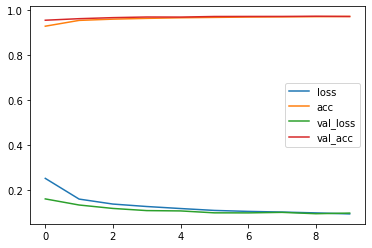

In [23]:
df = pd.DataFrame(model_DNN.history.history)
df.plot.line()

###Evaluation

In [24]:
model_DNN_load=tf.keras.models.load_model('moamel_DNN.h5')#Loading model 

In [25]:
y_pred=model_DNN_load.predict_classes(x_test)
y_pred=tf.keras.utils.to_categorical(y_pred)
pred_recall=metrics.recall_score(y_test_encode,y_pred,average='samples')

print('recall_score : ',pred_recall)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


recall_score :  0.9731865521651745


In [26]:
metrics.confusion_matrix(np.argmax(y_test_encode,axis=1),np.argmax(y_pred,axis=1))

array([[18049,    32,    26,     5,     6],
       [  208,   336,    10,     0,     2],
       [  121,     3,  1297,    24,     3],
       [   48,     0,    13,   101,     0],
       [   75,     1,    10,     0,  1522]])

## **Model 3: Convolution Neural Network**
##**Main model**

In [77]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
x_train = np.array(x_train).reshape(x_train.shape[0], 187,1)
x_test = np.array(x_test).reshape(x_test.shape[0], 187 ,1)

In [78]:
x_train.shape ,x_test.shape

((87554, 187, 1), (21892, 187, 1))

###Define model

In [79]:
model_cnn=tf.keras.Sequential([
                           Input([187,1]),
                           Conv1D(64,4,padding='same',activation='relu'),
                           MaxPool1D(),
                           Conv1D(64,4,padding='same',activation='relu'),
                           MaxPool1D(),
                           Flatten(),
                           Dense(64,activation='relu'),
                           Dropout(0.2),
                           Dense(64,activation='relu'),
                           Dropout(0.2),
                           Dense(5,activation='softmax')
])
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 187, 64)           320       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 93, 64)            16448     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 46, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2944)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                188480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

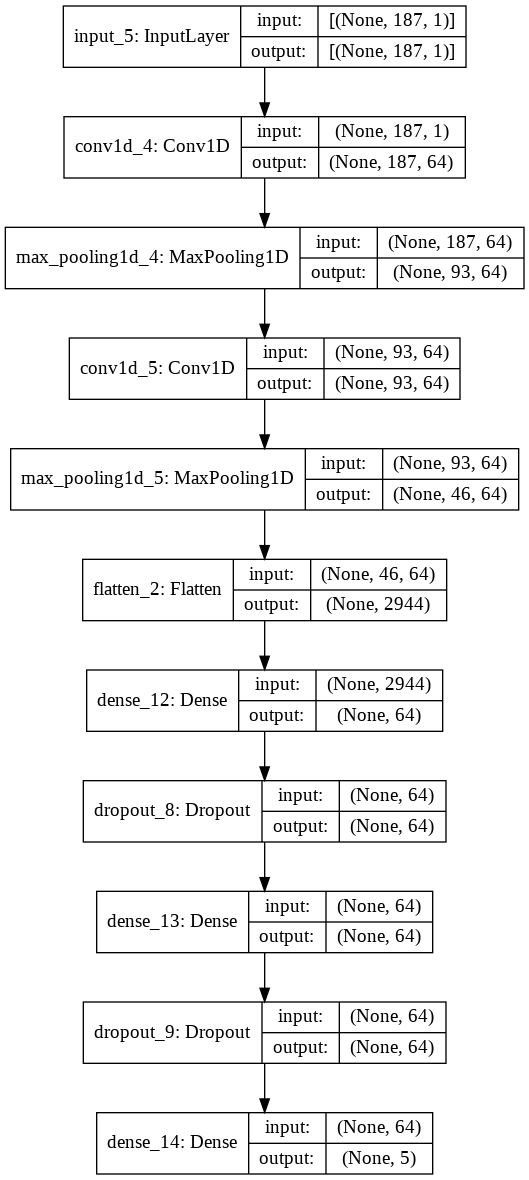

In [80]:
tf.keras.utils.plot_model(model_cnn , show_shapes=True, show_layer_names=True)

###Compile & Fitting

In [81]:
model_cnn.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [82]:
save_model=tf.keras.callbacks.ModelCheckpoint('moamel_CNN.h5',save_best_only=True)
model_cnn.fit(x_train,y_train_encode,epochs=10,validation_data=(x_test,y_test_encode),callbacks=[save_model])

Epoch 1/10
2737/2737 [==============================] - 52s 19ms/step - loss: 0.3315 - acc: 0.9115 - val_loss: 0.1239 - val_acc: 0.9654
Epoch 2/10
2737/2737 [==============================] - 51s 19ms/step - loss: 0.1233 - acc: 0.9662 - val_loss: 0.0995 - val_acc: 0.9733
Epoch 3/10
2737/2737 [==============================] - 53s 19ms/step - loss: 0.0981 - acc: 0.9735 - val_loss: 0.0866 - val_acc: 0.9762
Epoch 4/10
2737/2737 [==============================] - 54s 20ms/step - loss: 0.0881 - acc: 0.9747 - val_loss: 0.0801 - val_acc: 0.9778
Epoch 5/10
2737/2737 [==============================] - 53s 19ms/step - loss: 0.0725 - acc: 0.9794 - val_loss: 0.0790 - val_acc: 0.9787
Epoch 6/10
2737/2737 [==============================] - 53s 19ms/step - loss: 0.0672 - acc: 0.9801 - val_loss: 0.0778 - val_acc: 0.9804
Epoch 7/10
2737/2737 [==============================] - 52s 19ms/step - loss: 0.0602 - acc: 0.9823 - val_loss: 0.0771 - val_acc: 0.9804
Epoch 8/10
2737/2737 [==========================

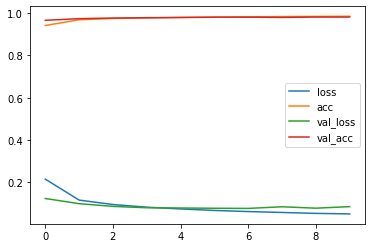

In [83]:
df = pd.DataFrame(model_cnn.history.history)
df.plot.line()

### Evaluation

In [84]:
model_CNN_load=tf.keras.models.load_model('/content/moamel_CNN.h5')
y_pred=model_CNN_load.predict_classes(x_test)
y_pred=tf.keras.utils.to_categorical(y_pred)

pred_recall = metrics.recall_score(y_test_encode,y_pred,average='samples')
print('recall_score :',pred_recall)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


recall_score : 0.9804038004750594


In [85]:
confusion_matrix=metrics.confusion_matrix(np.argmax(y_test_encode,axis=1),np.argmax(y_pred,axis=1))
confusion_matrix

array([[18071,    14,    20,     4,     9],
       [  196,   350,     8,     0,     2],
       [   71,     5,  1348,    21,     3],
       [   35,     1,    10,   116,     0],
       [   24,     0,     6,     0,  1578]])